- Inspired from demo.ipynb in NGSIM.jl
- Takeaways
    - 101 has 5 segments
    - Start from bottom of screen, 1 is bottom of screen, 2 is exit ramp,
    3 is straight section, 4 is entry to road till entry ramp 
    join point, 5 is entry ramp

In [1]:
using NGSIM
using AutomotiveDrivingModels
using AutoViz
using Interact # For slider bar trajectory propagation

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5dc1e185f8b2175037a0bb4bac5baa1c8ca39ea5-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5dc1e185f8b2175037a0bb4bac5baa1c8ca39ea5-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
roadway = ROADWAY_101;

# Overlay to highlight segments of roadway101

In [3]:
struct LaneOverlay <: SceneOverlay
    lane::Lane
    color::Colorant
end

function AutoViz.render!(rendermodel::RenderModel, overlay::LaneOverlay, scene::Scene, roadway::Roadway)
    render!(rendermodel, overlay.lane, roadway, color_asphalt=overlay.color) # this display a lane with the specified color
    return rendermodel
end

In [9]:
td = load_trajdata(1)
scene = get!(Scene(500), td, 1000);

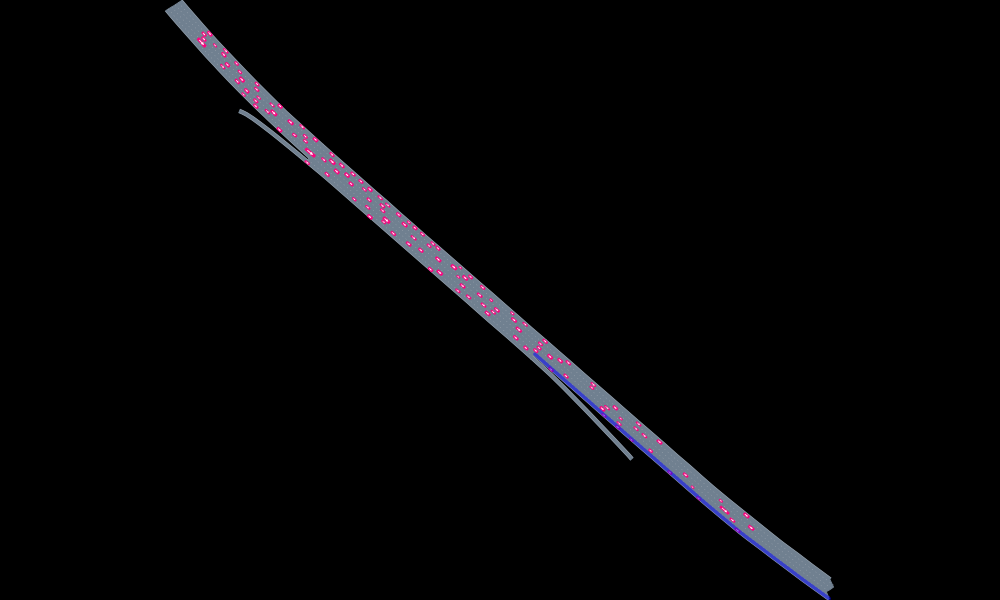

In [10]:
lane_overlay = LaneOverlay(roadway[LaneTag(1,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))

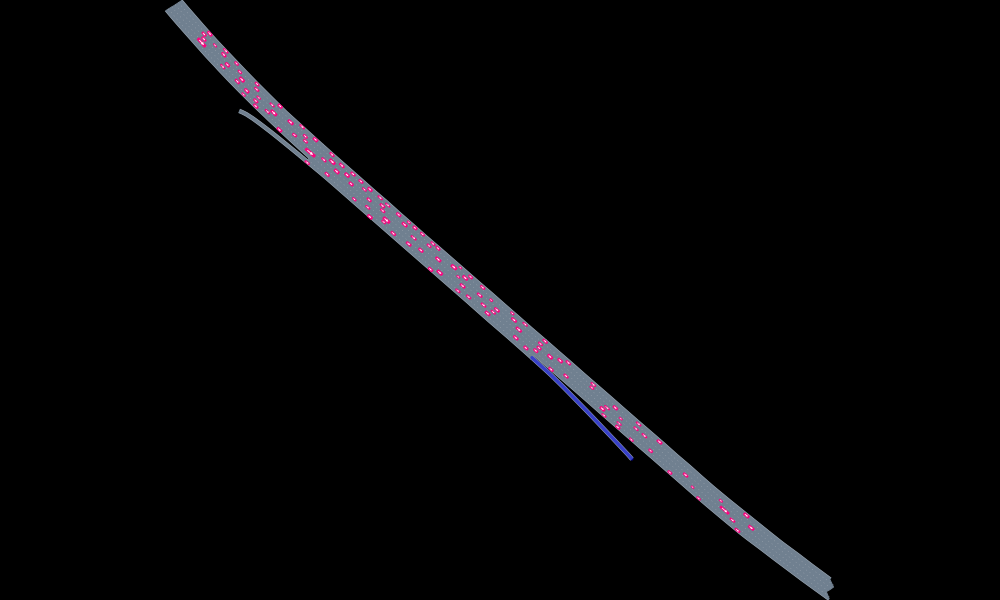

In [11]:
lane_overlay = LaneOverlay(roadway[LaneTag(2,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))

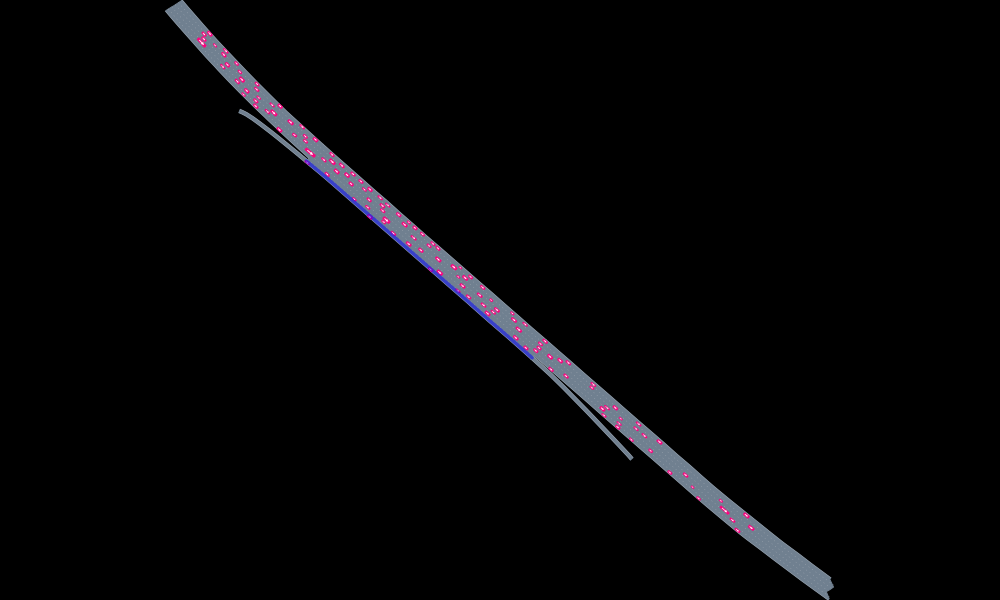

In [12]:
lane_overlay = LaneOverlay(roadway[LaneTag(3,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))

# Segment highlighting ends here

In [21]:
fieldnames(Scene(500).entities[1])
Scene(500).entities[24].state

VehicleState(VecSE2({0.000, 0.000}, 0.000), Frenet(RoadIndex({140268025984096, 0.000000}, {140268015226528, 140268023109652}), 0.000, 0.000, 0.000), 0.000)

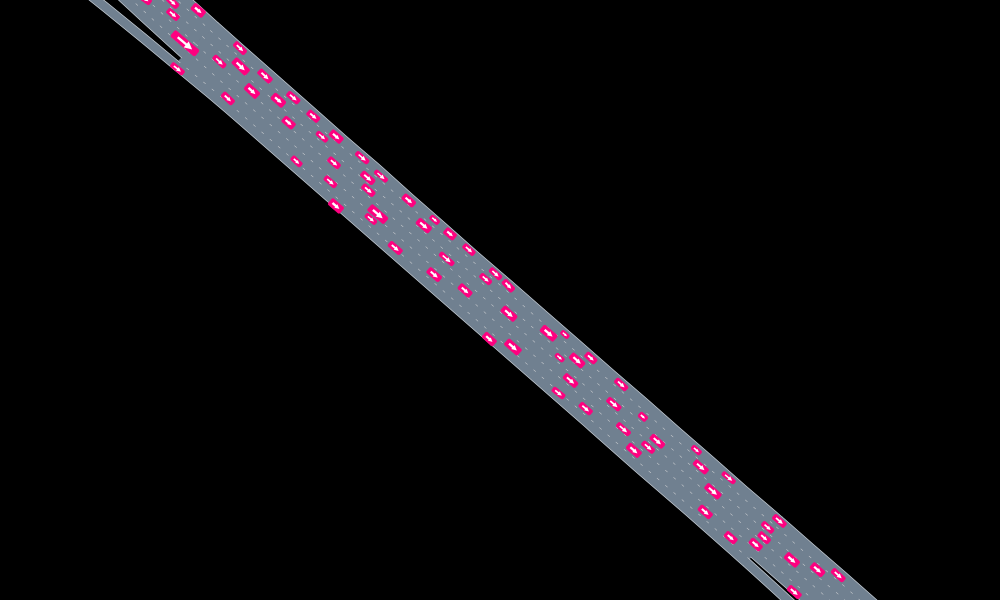

In [6]:
render(scene, ROADWAY_101)

In [ ]:
length(scene) #108
fieldnames(scene) #n, entitities
typeof(scene.entities) # array of records
size(scene.entities) #500
typeof(scene.entities[1]) # Records.entity
fieldnames(scene.entities[1])

In [3]:
td1 = load_trajdata(1)
scene = get!(Scene(500), td1, 1000);
render(scene, ROADWAY_101);

In [12]:
fieldnames(td1)

4-element Array{Symbol,1}:
 :timestep
 :frames  
 :states  
 :defs    

In [7]:
?Scene

search: Scene Scene1D SceneRecord SceneOverlay SceneFollowCamera



No documentation found.

`Records.Frame` is of type `UnionAll`.

**Summary:**

```
struct UnionAll <: Type{T}
```

**Fields:**

```
var  :: TypeVar
body :: Any
```


In [6]:
?get!

search: get! get_elapsed_time get_actions! get getpid getkey get_ids get_def



```
get!(collection, key, default)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => default`, and return `default`.

# Examples

```jldoctest
julia> d = Dict("a"=>1, "b"=>2, "c"=>3);

julia> get!(d, "a", 5)
1

julia> get!(d, "d", 4)
4

julia> d
Dict{String,Int64} with 4 entries:
  "c" => 3
  "b" => 2
  "a" => 1
  "d" => 4
```

```
get!(f::Function, collection, key)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => f()`, and return `f()`.

This is intended to be called using `do` block syntax:

```julia
get!(dict, key) do
    # default value calculated here
    time()
end
```

```
get!(sd,k,v)
```

Returns the value associated with key `k` where `sd` is a SortedDict, or else returns `v` if `k` is not in `sd`, and in the latter case, inserts `(k,v)` into `sd`. Time: O(*c* log *n*)


(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-7107ccad-5f9a-4589-a347-edef4a6276b2", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 2000),Pair{Symbol,Any}(:min, 1000),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 1500, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/raunak/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/raunak/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/raunak/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/raunak/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/raunak/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1500}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return
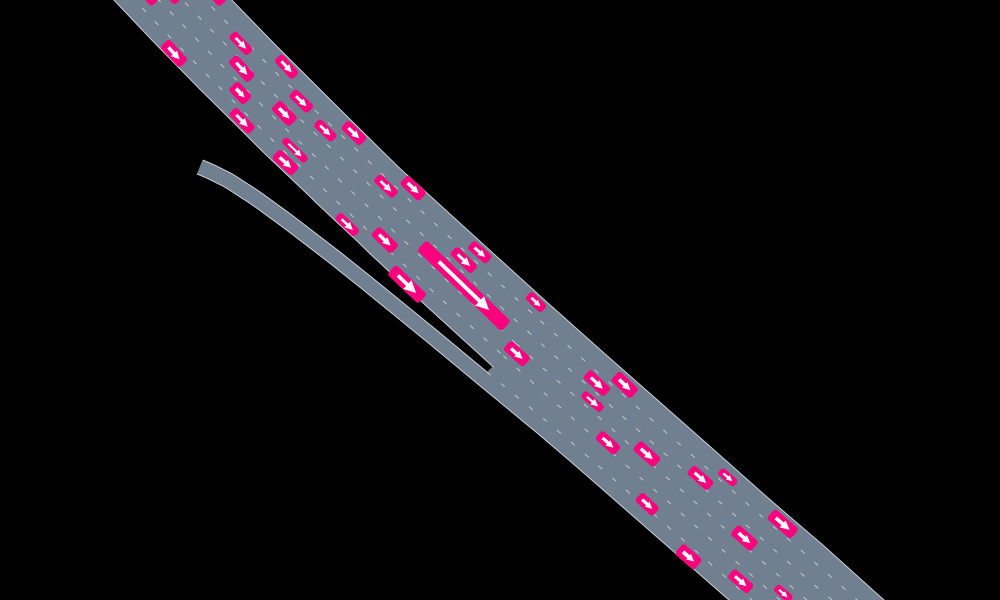
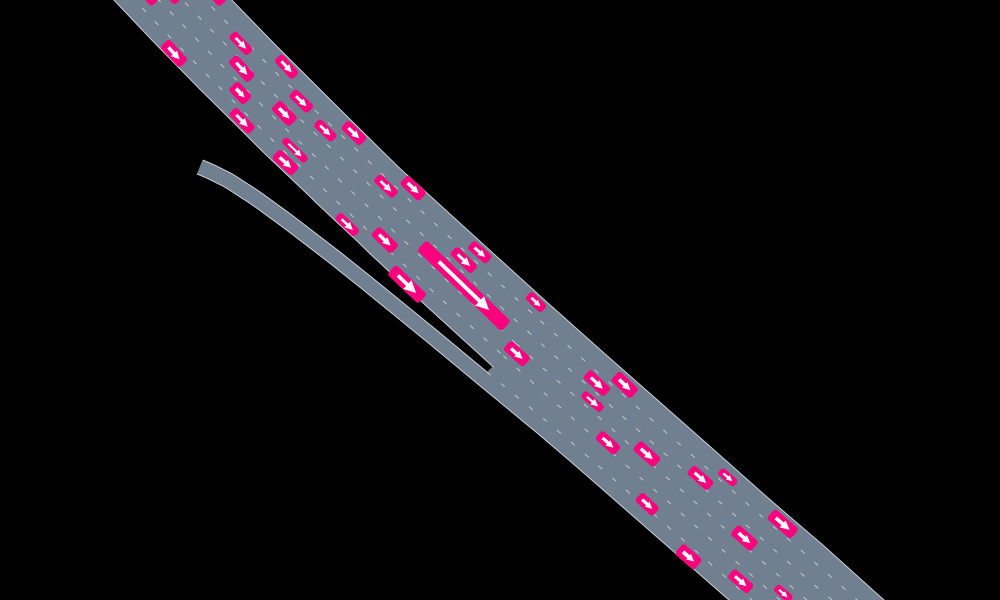

In [4]:
scene = Scene(500)
@manipulate for i in 1000:2000
     render(get!(scene, td1, i), ROADWAY_101, cam=StaticCamera(VecE2(1966400, 570900), 5.0))
end

In [ ]:
? @manipulate

In [ ]:
? get!